In [1]:
import yfinance as yf
import pandas as pd

In [2]:
# Setting the ticker
ticker = 'AAPL' 

In [3]:
# Setting the time period for the data
start_date = '2015-01-01'
end_date = '2023-01-01'

In [4]:
# Downloading the data
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Displaying the features/variables so I have the actual names handy for calling them
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
# Getting daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

C:\Users\bhpla\AppData\Local\Temp\ipykernel_25200\166514786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily Return'] = data['Adj Close'].pct_change()


In [10]:
# Getting rid of missing values
data = data.dropna()

In [12]:
# Displaying the first 10 rows of the daily returns
print(data[['Adj Close', 'Daily Return']].head(10))

            Adj Close  Daily Return
Date                               
2015-01-06  23.689528      0.000094
2015-01-07  24.021713      0.014022
2015-01-08  24.944687      0.038422
2015-01-09  24.971437      0.001072
2015-01-12  24.356129     -0.024641
2015-01-13  24.572372      0.008878
2015-01-14  24.478737     -0.003811
2015-01-15  23.814384     -0.027140
2015-01-16  23.629343     -0.007770
2015-01-20  24.237967      0.025757


In [13]:
import numpy as np

In [14]:
# Setting the confidence level
confidence_level = .95

In [15]:
# Calculate the percentile corresponding to the confidence level
var_percentile = 100 * (1 - confidence_level)

In [16]:
# Calculate VaR
historical_var = np.percentile(data['Daily Return'], var_percentile)

In [17]:
# Calculate VaR in dollar terms
# Setting an assumed initial investment of $10,000
initial_investment = 10000
var_dollar = historical_var * initial_investment

In [18]:
# Display the results
print(f"Historical VaR (1-day, {confidence_level*100}% confidence level): {historical_var:.2%}")
print(f"VaR in dollar terms for a ${initial_investment} investment: ${var_dollar:.2f}")

Historical VaR (1-day, 95.0% confidence level): -2.89%
VaR in dollar terms for a $10000 investment: $-289.12


In [20]:
import matplotlib.pyplot as plt

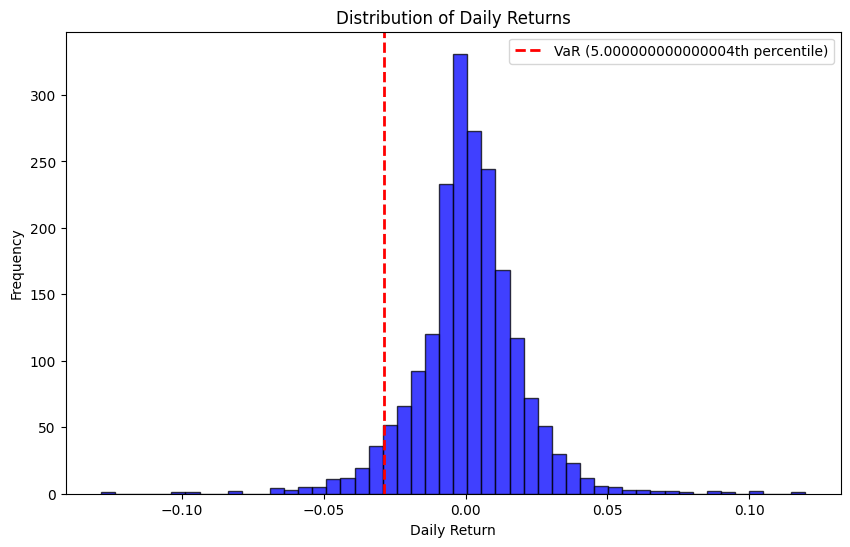

In [23]:
# Plotting the distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Return'], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(historical_var, color='red', linestyle='dashed', linewidth=2, label=f'VaR ({var_percentile}th percentile)')


# Adding labels and title
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()